In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import gc

In [2]:
#import dataframe
path=r'C:\Users\Alex\Instacart Basket Analysis'

In [3]:
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Instacart_Basket_Merged.pkl'))

In [32]:
df.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,eval_set,...,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_frequency,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Regularly busy,Busiest days,Most Orders,18,Regular customer,11.74,High spender,12.5,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Regularly busy,Most Orders,18,Regular customer,11.74,High spender,12.5,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Regularly busy,Busiest days,Most Orders,18,Regular customer,11.74,High spender,12.5,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Regularly busy,Regularly busy,Most Orders,18,Regular customer,11.74,High spender,12.5,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Regularly busy,Least busy days,Most Orders,18,Regular customer,11.74,High spender,12.5,Regular customer,both


In [31]:
df.describe

<bound method NDFrame.describe of          user_id  gender     state  age date_joined  number_of_dependants  \
0          26711  Female  Missouri   48    1/1/2017                     3   
1          26711  Female  Missouri   48    1/1/2017                     3   
2          26711  Female  Missouri   48    1/1/2017                     3   
3          26711  Female  Missouri   48    1/1/2017                     3   
4          26711  Female  Missouri   48    1/1/2017                     3   
...          ...     ...       ...  ...         ...                   ...   
3184702    14338    Male  Delaware   49    4/1/2020                     1   
3184703    14338    Male  Delaware   49    4/1/2020                     1   
3184704    14338    Male  Delaware   49    4/1/2020                     1   
3184705    14338    Male  Delaware   49    4/1/2020                     1   
3184706    14338    Male  Delaware   49    4/1/2020                     1   

        marital_status  income  order_id 

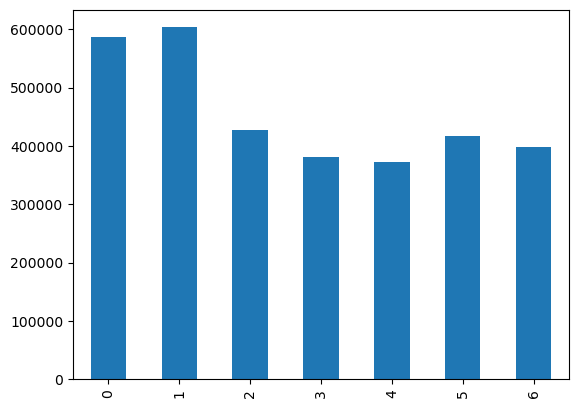

In [4]:
#create a bar chart
bar_graph=df['orders_day_of_week'].value_counts().sort_index().plot.bar()

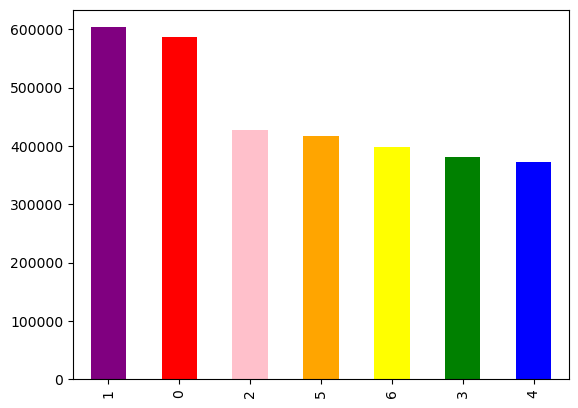

In [8]:
bar_graph_color=df['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
#Save graph
bar_graph_color.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_ORDERS_DOW.png'))

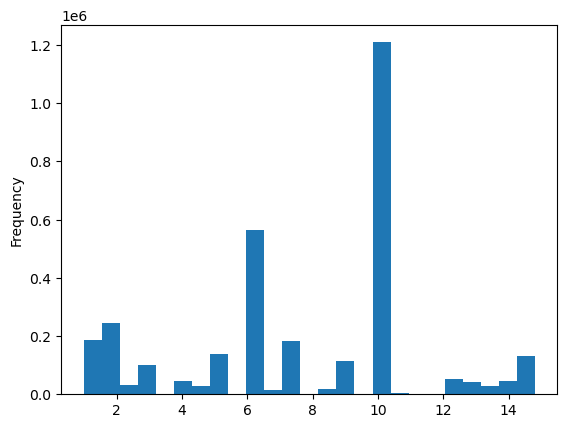

In [10]:
#histogram for prices column with 25 bins
hist_1=df['prices'].plot.hist(bins=25)

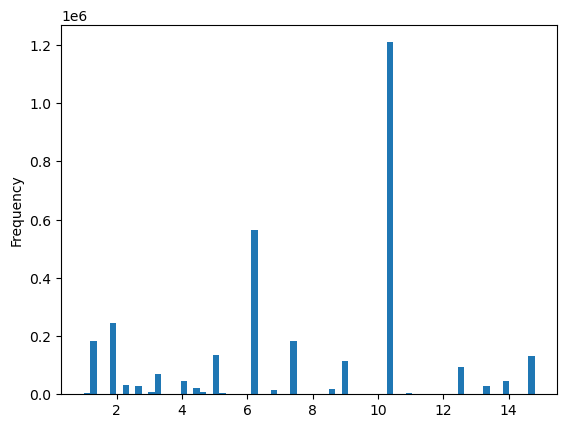

In [11]:
#Histogram for prices column with 70 bins
hist_2=df['prices'].plot.hist(bins=70)

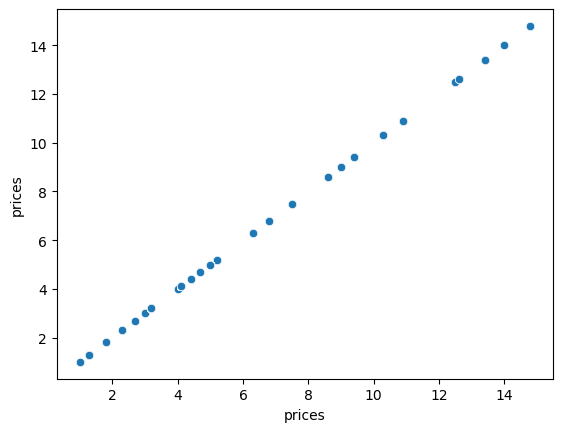

In [12]:
#Scatterplot of the prices column
scat=sns.scatterplot(x='prices', y='prices', data=df)

In [13]:
#Creating a 70/30 Sampling of the dataframe
np.random.seed(4)

In [14]:
dev=np.random.rand(len(df))<=0.7

In [16]:
#List of randomized true and false values
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
#Testing the size of the array
dev.shape

(3184707,)

In [18]:
#Sample Example of the function
np.random.rand(10)

array([0.29570165, 0.54960995, 0.81721851, 0.61239929, 0.15254418,
       0.35435207, 0.42273665, 0.88981148, 0.84737617, 0.40566067])

In [19]:
#Store the dataframe into two samples, 70 / 30
big=df[dev]
small=df[~dev]

In [20]:
#Length of the sum of the two sample spaces
len(big)+len(small)

3184707

In [21]:
#Creating another dataframe to include only orders_day_of_week ad prices from the small sample space
df_2=small[['orders_day_of_week', 'prices']]

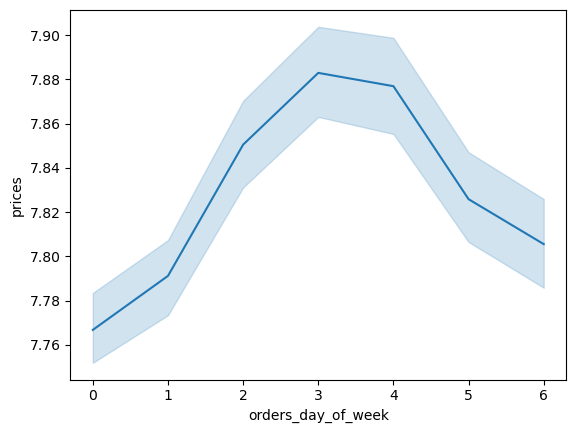

In [22]:
#Creating a line graph using the dataframe made of the small sample space
line=sns.lineplot(data=df_2, x='orders_day_of_week', y='prices')

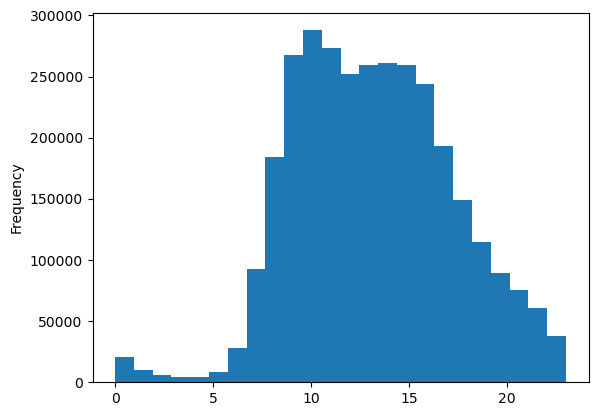

In [26]:
#Create a histogram of the "orders_hour_of_day" column
hist_3=df['order_time_of_day'].plot.hist(bins=24)

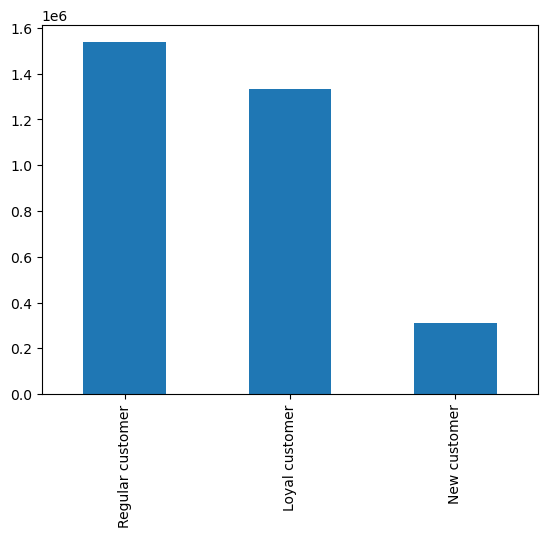

In [27]:
#Plotting bar chart to measure loyalty
bar_4=df['loyalty_flag'].value_counts().plot.bar()

In [28]:
#Line chart to determine if there's a difference in expenditure between hour of day and prices
df_line=small[['order_time_of_day', 'prices']]

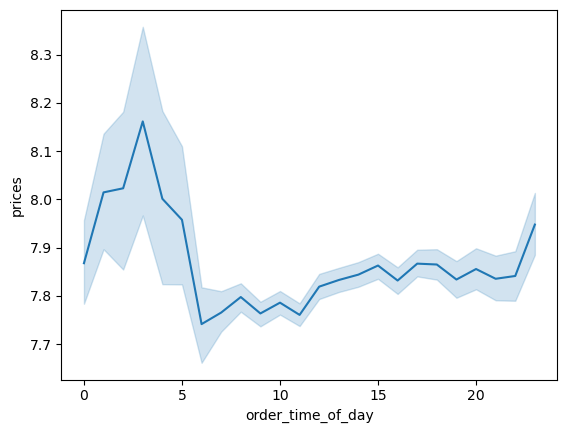

In [29]:
line_2=sns.lineplot(data=df_line, x='order_time_of_day', y='prices')

In [34]:
#Line chart to determine if there's a connection between age and number of dependants
df_line_2=small[['age', 'number_of_dependants']]

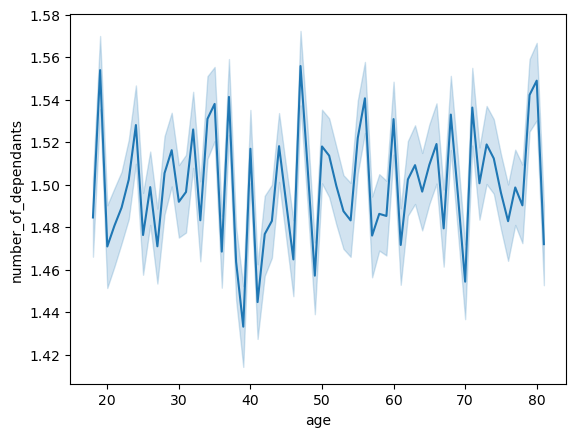

In [35]:
#Creating the line chart
line_3=sns.lineplot(data=df_line_2, x='age', y='number_of_dependants')

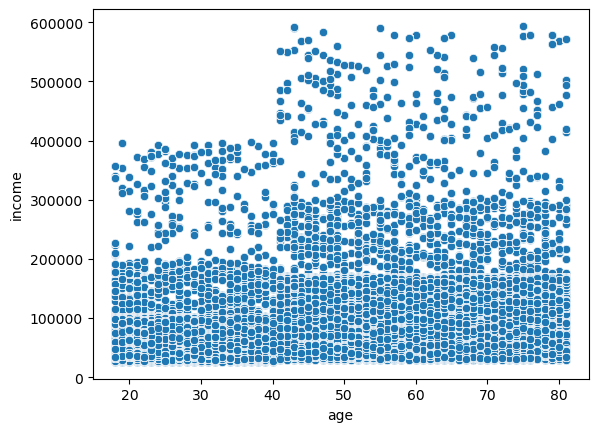

In [36]:
#Scatterplot to determine if there is a connection between age and spending power
scat_2=sns.scatterplot(x='age', y='income', data=df)

In [ ]:
#Export your visualizations as .png files in your relevant project folders

In [38]:
#Export bar chart for order_day_of_week column
bar_graph_color.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'BAR_ORDERS_DOW'))

In [40]:
#Export Histogram for prices column with 25 bins
hist_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'HIST_PRICES_25.png'))

In [41]:
#Export Historgram for prices column with 70 bins
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'HIST_PRICES_70.png'))

In [42]:
#Export Scatterplot of the prices column
scat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'SCAT_PRICES.png'))

In [43]:
#Export line chart of prices vs order_day_of_week
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','LINE_PRICE_DOW.png'))

In [44]:
#Export Histogram for order_hour_of_day column
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','HIST_ORDER_HOD.png'))

In [45]:
#Export bar chart to measure loyalty frequency
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','BAR_LOYAL.png'))

In [46]:
#Export line chart to determine if there's a difference in expenditure between hour of day and prices
line_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','LINE_PRICE_HOD.png'))

In [47]:
#Export line chart to determine if there's connection between age and number of dependants
line_3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','LINE_AGE_DEP.png'))

In [48]:
#Export scatterplot to determine if there is a connection between age and spending power
scat_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','SCAT_AGE_INCOME.png'))